# TP FILE DYNAMIQUE

NOM ÉTUDIANT : GHOUILEM Abdelhafidh


Suivre la même approche que pour les TP et notebooks précédents. 

## SUJET TP File dynamique d'éléments

Il s’agit d’implanter la structure de donnéees **MA FILE** (FIFO - first in, first out - le premier entré est le premier sorti) :
— insérer un élément consiste à ajouter un élément en **queue de file**,
— retirer un élément consiste à supprimer l’élément en **tête de file**  .
Une file est dite dynamique quand on n’utilise que la place mémoire correspondant au nombre réel d’éléments
mémorisés. Donc la place en mémoire occupée par la file va évoluer au cours de l’exécution du programme.
Pour cela, une **file dynamique** sera représentée par une **structure contenant 2 pointeurs**, un vers la **tête** de la
file et un vers la **queue** de la file.

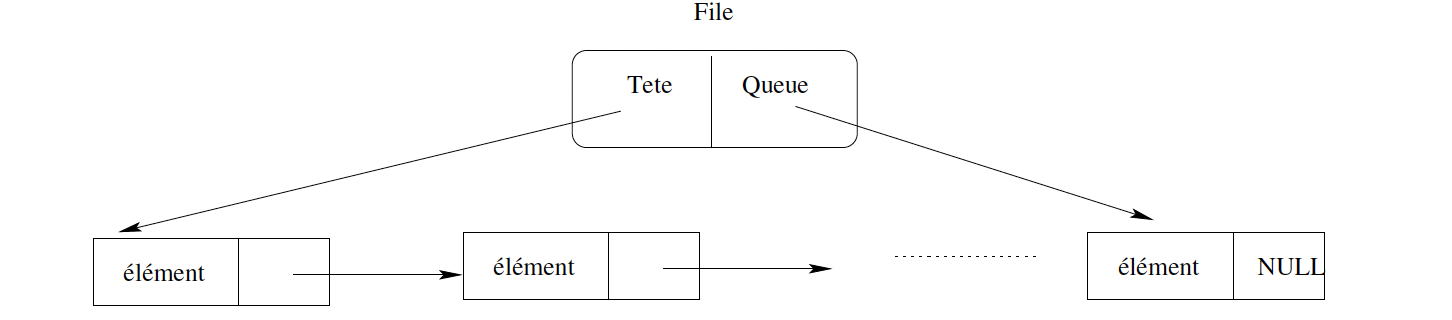


## PARTIE 1 : création de l'unité File Dynamique et du fichier de test associé

## Fichier file_dyn.h et Fichier file_dyn.c

1- Créer le fichier **file_dyn.h** dans lequel vous définirez le **type**  le type **MA FILE**. 
    Votre file doit pouvoir contenir des éléments de type quelconque définis à l’avance, pour cela, il faudra utiliser le type ELEMENT de 
    l’unité element définie aux TPs précédents (avec un type ELEMENT correspondant au type entier dans le cadre des tests).

Dans le fichier **file_dyn.c** 

2. Définir ensuite la fonction **INIT FILE** qui initialise la file donnée en paramètre.
   
3. Définir une fonction **AFFICHE FILE** qui permet d’afficher tous les éléments d’une file donnée en paramètre.

4. Définir une fonction **FILE_EST_VIDE** qui permet de tester si la file donnée en paramètre est vide.

5. Définir une procédure **ENFILER** qui permet d’enfiler un élément donné en paramètre à la file également donnée en paramètre. 
    Cette fonction doit placer l’élément en queue de file. Voir remarque ci-après.

6. Définir une fonction **DEFILER** qui permet de défiler une file donnée en paramètre).
    Cette fonction doit renvoyer aussi l’élément qui était en tête de file. Voir remarque ci-après.

7. Définir une fonction **SAISIR FILE** qui permet de saisir une file en demandant à l’utilisateur d’entrer les éléments un par un et les insère dans la file.

8. Compléter le fichier fime_dyn.h avec les déclarations des fonctions définies ci-dessus.

9. Ecrire le programme principal **test_file_dyn.c** qui permet de tester TOUTES les fonctions (tests unitaires des fonctions de l'unité FILE DYNAMIQUE) en envisageant tous les cas possibles.

REMARQUE : La procédure **ENFILER** et la fonction **DEFILER** doivent être efficaces, c’est-à-dire qu’elles doivent faire
le moins d’opérations possibles.


## Fichier file_dyn.h

COPIER ICI LE CONTENU DE VOTRE FICHIER file_dyn.h
#ifndef __FILE_DYNAMIQUE_H__
#define __FILE_DYNAMIQUE_H__
#include "element.h"

	/*DEFINITION DES TYPES*/
	/*on definie la cellule (elle va contenir un ptr vers la cellule suivante et un element) */
	typedef struct cellule {
		/*ptr_suivant va pointer vers la cellule suivante*/
		struct cellule *ptr_suivant; /*on ne peut pas encore utiliser tp_cell alors on reecrit struct cellule*/
		ELEMENT elm; 		
	}tp_cell;
	
	typedef struct MA_FILE {
		tp_cell *tete;
		tp_cell *queue;
	}MA_FILE;  /*MA_FILE ça va pointer vers deux cellules le debut et la fin de la la_file*/

	
	/*DECLARATION DES PROTOTYPES*/
	MA_FILE init_FILE(void);
	int FILE_estVide(MA_FILE la_file);
	void affiche_FILE(MA_FILE la_file);
	MA_FILE enFILE(MA_FILE la_file, ELEMENT elm);
	MA_FILE deFILE(MA_FILE la_file, ELEMENT* ptr_elm);
	MA_FILE saisir_FILE(MA_FILE la_file);

#endif



## Fichier file_dyn.c

COPIER ICI LE CONTENU DE VOTRE FICHIER file_dyn.c
#include <stdio.h>
#include <stdlib.h> /*pour utiliser malloc*/
#include "element.h"
#include "file_dyn.h"

/**
 * @brief prend ladresse de la file initialise la tete et la queue de la file a null
 */
MA_FILE init_FILE(void){
    MA_FILE new_file;
    new_file.tete = NULL;
    new_file.queue = NULL;
    return new_file;
}

int FILE_estVide(MA_FILE la_file){
    if (la_file.tete == NULL){
        return 1;
    } return 0;
}


/**
 * @brief affichier chaque cellule de la file
 */
void affiche_FILE(MA_FILE la_file){
    if (FILE_estVide(la_file)){
        /* Petit changement ici: afficher [] est plus propre qu'une erreur stderr pour une file vide */
        printf("[]\n"); 
        return;
    }
    tp_cell *ptr_courant = la_file.tete;
    printf("[ ");
    /*parcourire la file jusqua la queue*/
    while(ptr_courant != NULL){
        /*on affiche lelement de la celule avant de passer a la suivante*/
        affiche_ELEMENT(ptr_courant->elm);
        ptr_courant = ptr_courant->ptr_suivant;
    }
    printf("]\n");
}



/**
 * @brief ajoute une cellule a la file pointée par la queue et lui ajoute un element
 */
MA_FILE enFILE(MA_FILE la_file, ELEMENT elm){
    /*creation de la nouvelle cellule a enfiler*/
    tp_cell *new_cell = malloc(sizeof(tp_cell));
    if(new_cell == NULL){
        fprintf(stderr, "ERREUR: probléme dalocation dynamique");
        return la_file;
    }
    
    /*definir la nouvelle cellule*/
    new_cell->elm = elm;
    new_cell->ptr_suivant = NULL;

    /*s'il ny as ni queue ni tete la cellule ajouter devien la queue et la tete*/
    if (la_file.tete == NULL){
        la_file.tete = new_cell;
        la_file.queue = new_cell;
    }
    else{
        /*la cellule davant pointe vers la cellule ajouter*/
        la_file.queue->ptr_suivant = new_cell ;
        /*la cellule ajouter devien la nouvelle queue*/
        la_file.queue = new_cell;
    }
    
    return la_file;
}



/**
 * @brief retire la cellule pointée par la tete de la file et recupére sont element
 */
MA_FILE deFILE(MA_FILE la_file, ELEMENT *ptr_elm){
    if(FILE_estVide(la_file)){
        fprintf(stderr,"la pile est vide !\n");
        return la_file;
    }
    /*une cellule temporaire pour tete pour faire un free()*/
    tp_cell *temp_cell = la_file.tete;

    /*recupérer l'element de lancienne tete*/
    *ptr_elm = temp_cell->elm;
    
    /*la nouvelle tete cest la cellule pointé par la tete precedente*/
    la_file.tete = temp_cell->ptr_suivant;

    /*si la tete devien null (il y avais qune cellule dans la file)*/
    if(la_file.tete == NULL){
        la_file.queue = NULL;
    }

    /*libérer le malloc*/
    free(temp_cell);

    return la_file;
}



MA_FILE saisir_FILE(MA_FILE la_file){
    /*initialisation*/
    int n; 
    int i;
    ELEMENT elm;
    
    /*demander le nombre delement a saisir*/
    printf("combien de d'élement vous voulais ajouter : ");
    scanf("%d", &n);

    /*ajouter chaque-element*/
    for (i = 0; i < n ;i++){
        
        printf("Element %d : ", i); /* Ajout pour la clarté */
        
        /*prend l'adresse d'une variable locale (&elm)*/
        saisir_ELEMENT(&elm);
        
        /* on va recupérer la file modifiée par enFILE */
        la_file = enFILE(la_file, elm);
    }

    return la_file;
}

## Fichier tst_file_dyn.c
COPIER ICI LE CONTENU DE VOTRE FICHIER test_file_dyn.c
#include <stdio.h>
#include "element.h"
#include "file_dyn.h"

int main(void){
    /* DECLARATION DES VARIABLES */
    MA_FILE ma_file;
    ELEMENT un_element;
    ELEMENT elm;


    /* --- INITIALISATION --- */
    printf("\nTEST: init_FILE()\n");
    ma_file = init_FILE();
    

    printf("\nTEST: enFILE()\n");
    
    /* On ajoute 10 */
    un_element = 10;
    ma_file = enFILE(ma_file, un_element);
    affiche_FILE(ma_file);

    /* On ajoute 20 */
    un_element = 20;
    ma_file = enFILE(ma_file, un_element);
    affiche_FILE(ma_file);

    /* On ajoute 30 */
    un_element = 30;
    ma_file = enFILE(ma_file, un_element);
    affiche_FILE(ma_file);

    
    printf("\nTEST: deFILE()\n");
    ma_file = deFILE(ma_file, &elm);
    printf("on as recuperer lelement suivant : ");
    affiche_ELEMENT(elm); /* elle dooit afficher 10 (recuperer a la derniere cellule) */

    printf("\nnotre nouvelle file :");
    affiche_FILE(ma_file); /* Doit afficher [ 20 30 ] */

    printf("\nTEST: saisir_FILE()\n");
    ma_file = saisir_FILE(ma_file);
    affiche_FILE(ma_file);


    return 0;
}

## Makefile 

COPIER ICI LE CONTENU DU FICHIER **Makefile** UTILISÉ POUR COMPILER L'UNITÉ File Dynamlique et générer le programme **test_file_dyn.out**


prog_tst_file_dyn.out: element.o tst_file_dyn.o file_dyn.o
	gcc -o prog_tst_file_dyn.out element.o tst_file_dyn.o file_dyn.o


element.o: element.c element.h
	gcc -c element.c -o element.o -W -Wall -pedantic

file_dyn.o: file_dyn.c element.h file_dyn.h
	gcc -c file_dyn.c -o file_dyn.o -Wall -pedantic


tst_file_dyn.o: tst_file_dyn.c element.h file_dyn.h
	gcc -c tst_file_dyn.c -o tst_file_dyn.o -W -Wall -pedantic

clean: 
	rm -rf *.o *.out

## Compilation et exécution

REPORTER ICI LA COMMANDE DE COMPILATION ET SON RÉSULTAT
hafidh@hafidh-Victus-by-HP-Gaming-Laptop-15-fa0xxx:~/Documents/ETUDE/S1/Programmation_imprative/TPC/TP_FILE_DYNAMIQUE$ make prog_tst_file_dyn.out 
gcc -c tst_file_dyn.c -o tst_file_dyn.o -W -Wall -pedantic
gcc -o prog_tst_file_dyn.out element.o tst_file_dyn.o file_dyn.o

REPORTER ICI LE RÉSULTAT DES TESTS DE L'UNITÉ FILE DYNAMIQUE
hafidh@hafidh-Victus-by-HP-Gaming-Laptop-15-fa0xxx:~/Documents/ETUDE/S1/Programmation_imprative/TPC/TP_FILE_DYNAMIQUE$ ./prog_tst_file_dyn.out 

TEST: init_FILE()

TEST: enFILE()
[ 10 ]
[ 10 20 ]
[ 10 20 30 ]

TEST: deFILE()
on as recuperer lelement suivant : 10 
notre nouvelle file :[ 20 30 ]

TEST: saisir_FILE()
combien de d'élement vous voulais ajouter : 4
Element 0 : ELEMENT => 3
Element 1 : ELEMENT => 6
Element 2 : ELEMENT => 8
Element 3 : ELEMENT => 2 
[ 20 30 3 6 8 2 ]

## PARTIE 2 : APPLICATION

Soit une caisse de cinéma. On veut écrire le programme en C qui calcule le nombre de tickets vendus et la valeur de la caisse en fin de journée sachant que :
— en début de journée, la caisse est vide,
— il y a plusieurs séances par jour mais il s’agit d’un nombre fixe,
— chaque séance correspond à une file de clients,
— chaque client correspond à un nombre de tickets et un prix total correspondant à l’achat de tous ces tickets.

## RENDU TP PARTIE 1 et 2 
Déposer une archive du votre dossier contenant l'unité File Dynamique ainsi que l'application CINEMA sur le dépôt dédié

## PARTIE 3 optionnelle : File statique d'éléments

Il s’agit toujours d’implanter la structure de données MA FILE (FIFO), mais maintenant de manière statique.

Une file est dite statique quand la place qu’elle occupe en mémoire est toujours la même quel que soit le
nombre réel d’éléments dans la file.

Pour cela, les éléments de la file seront mémorisés dans un tableau de taille fixée (TMAX) d’éléments.

Remarque : Les procédures ENFILER et DEFILER doivent toujours être efficaces, c’est-à-dire qu’elles
doivent faire le moins d’opérations possibles. Cette remarque est particulièrement importante dans le cas
statique !

Créer l’unitéFile Statique et le fichier de test associé qui permettent de :

1. Définir le type MA FILE.
       Votre file doit pouvoir contenir des éléments de type quelconque définis à l’avance, pour cela, il faudra utiliser le type ELEMENT de
        l’unité element définie aux TPs précédents (avec un type ELEMENT correspondant au type entier dans le cadre des tests).
   
2. Définir la fonction **INIT FILE** qui initialise la file donnée en paramètre.

3. Définir une fonction **AFFICHE FILE** qui permet d’afficher tous les éléments de la file donnée en paramètre.

4. Définir une fonction **FILE EST VIDE** qui permet de tester si la file donnée en paramètre est vide.

5. Définir une fonction **FILE EST PLEINE** qui permet de tester si la file est pleine.

6. Définir une fonction **ENFILER** qui permet d’enfiler un élément donné en paramètre) à la file donnée également en paramètre.
    Cette fonction doit placer l’élément en fin de file. Voir remarque ci-dessus.

7. Définir une fonction **DEFILER** qui permet de défiler une file donnée en paramètre.
    Cette fonction doit renvoyer aussi l’élément qui était en tête de file. Voir remarque ci-dessus.

8. D´efinir une fonction ** SAISIR FILE** qui permet de saisir une file en demandant à l’utilisateur d’entrer les éléments un par un et en les insérant dans la file.

Vous devez tester TOUTES vos fonctions en envisageant TOUS LES CAS possibles.


## Fichier file_stat.h, File_stat.c tst_file_stat.c Makefile et résultat
Créer les cellules Markdonwn nécessaires pour y reporter : 
- chacun des fichiers qui composent l'unité File Statique,
- le Makefile qui permet la compilation
- le résultat de la compilation
- et les tests unitaires de cette unité.

## PARTIE 4 optionnelle : Application
Reprendre le programme de calcul pour le cinéma écrit dans la partie 2 et le faire tourner avec des files statiques.
Si vous avez bien “travaillé”, vous ne devriez avoir QU’UNE SEULE modification à y faire.

## RENDU TP PARTIE 3 et 4
Ajouter une seconde archive de votre dossier contenant l'unité File Statique ainsi que l'application CINEMA adaptée à cette nouvelle unité sur le dépôt dédié